Number of buildings: 8199


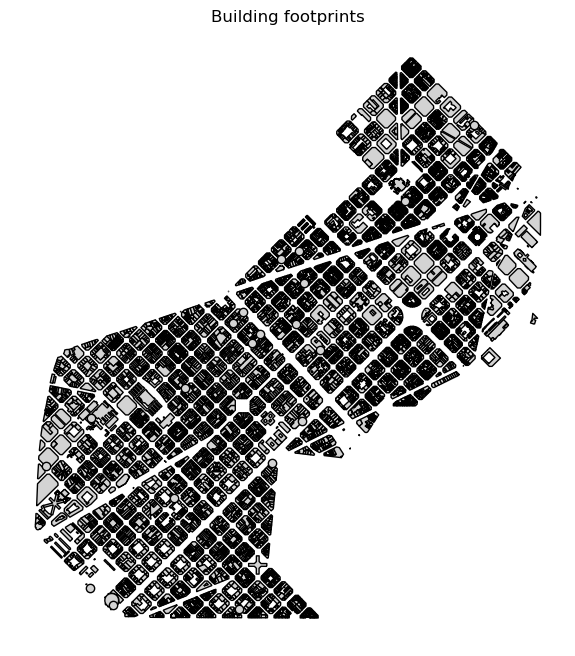

In [4]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# 🆕 Use updated API: `features_from_place` (not deprecated `geometries_from_place`)
place = "L'Eixample, Barcelona, Spain"  # more reliable than "Gràcia"

tags = {"building": True}

# ⚠️ Fix: Use updated function (OSMnx v2.x)
buildings = ox.features_from_place(place, tags=tags)

# Drop invalid geometries
buildings = buildings[buildings.geometry.notnull()]

# Project to metric CRS
buildings = buildings.to_crs(epsg=3857)

# Check what you got
print("Number of buildings:", len(buildings))
buildings.plot(figsize=(8, 8), color="lightgray", edgecolor="black")
plt.title("Building footprints")
plt.axis("off")
plt.show()



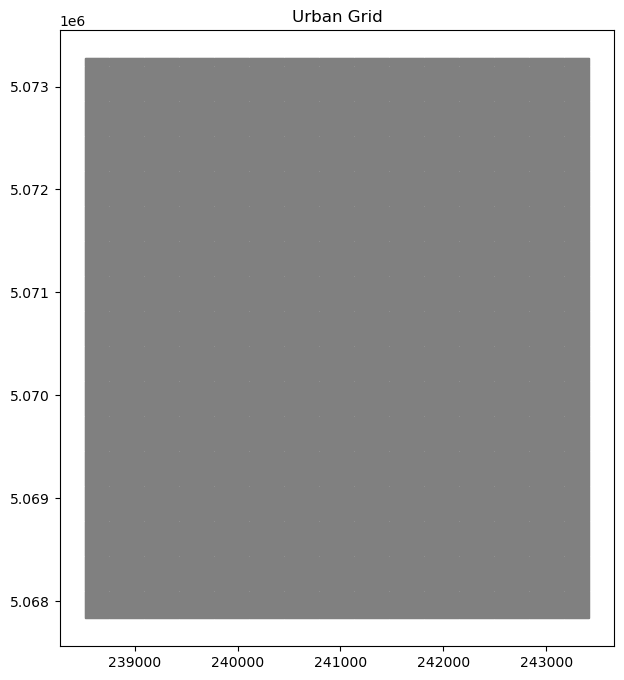

In [5]:
# Define grid size
cell_size = 10  # meters

xmin, ymin, xmax, ymax = buildings.total_bounds
grid_cells = []
for x in range(int((xmax - xmin) / cell_size)):
    for y in range(int((ymax - ymin) / cell_size)):
        x0 = xmin + x * cell_size
        y0 = ymin + y * cell_size
        cell = box(x0, y0, x0 + cell_size, y0 + cell_size)
        grid_cells.append(cell)

# Create GeoDataFrame
grid = gpd.GeoDataFrame(geometry=grid_cells, crs=buildings.crs)
grid.plot(edgecolor="gray", facecolor="none", figsize=(8, 8))
plt.title("Urban Grid")
plt.show()

